# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [80]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'plt'

In [307]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [73]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

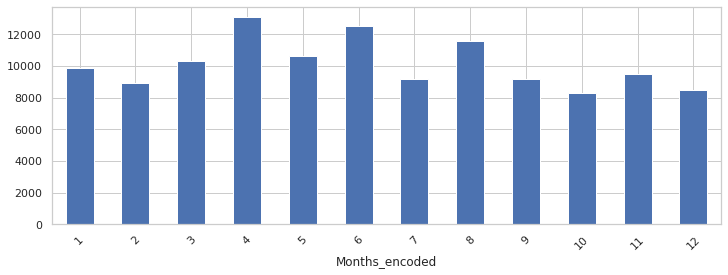

In [117]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
steps = fitbit.groupby(["Months_encoded"])["Steps"].mean().plot(kind="bar")
plt.xticks(rotation=45);

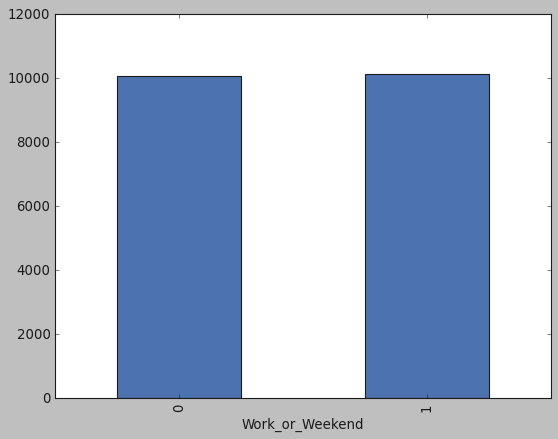

In [302]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
stepsWeekend = fitbit.groupby(["Work_or_Weekend"])["Steps"].mean().plot(kind="bar")


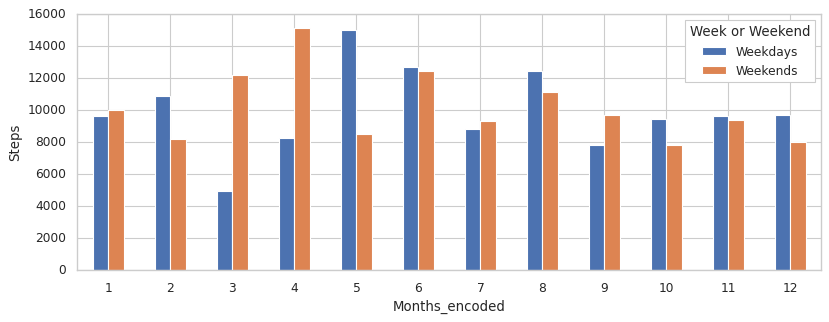

In [313]:
Week_weekend = fitbit.groupby(["Months_encoded","Work_or_Weekend"])["Steps"].mean().unstack().plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Steps")
plt.legend(title='Week or Weekend', labels=['Weekdays', 'Weekends'])

In [138]:
steps.figure.savefig('figures/steps_month.png')

In [312]:
stepsWeekend.figure.savefig('figures/steps_weekdays.png', dpi = 1000)
Week_weekend.figure.savefig('figures/Week_weekend.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

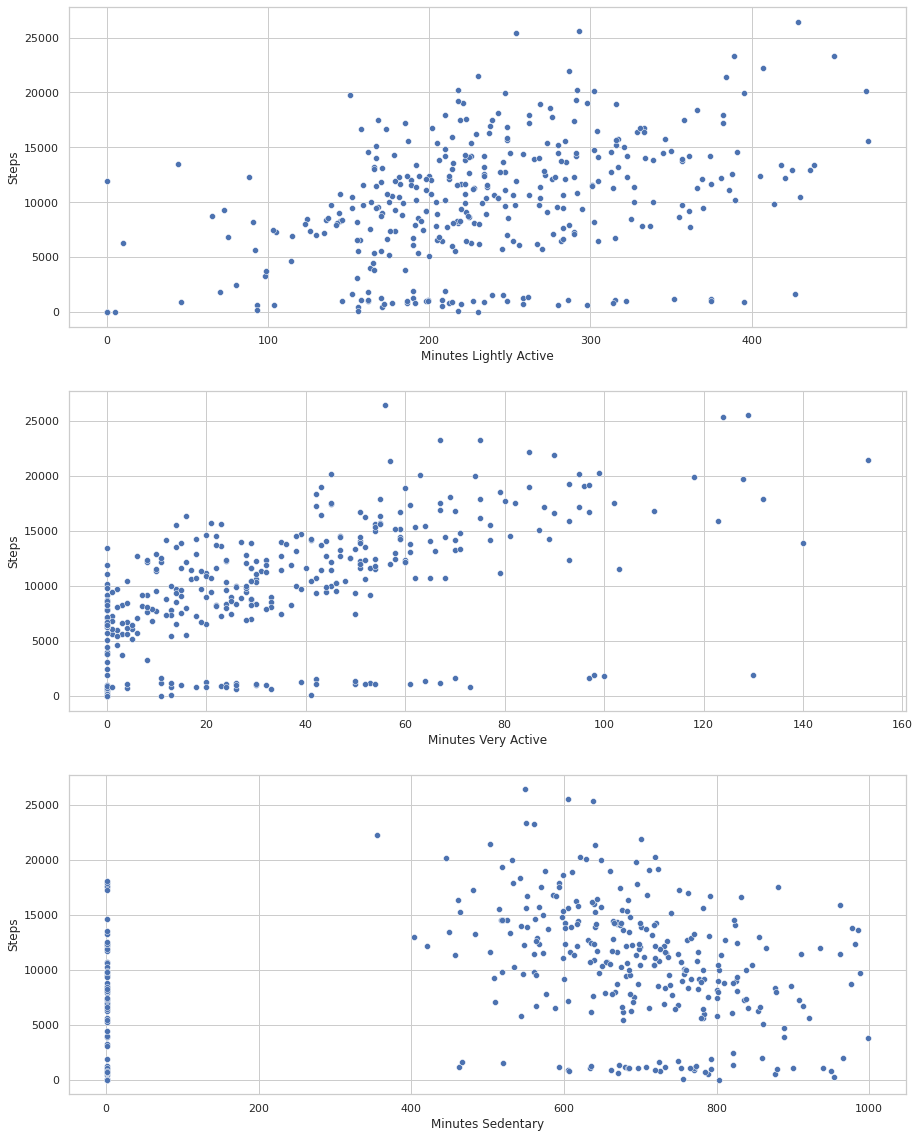

In [154]:
# your code here
figure, axis = plt.subplots(nrows=3, ncols=1, figsize=(15,20))
scatter_lightly = sns.scatterplot(x="Minutes Lightly Active", y="Steps", data=fitbit, ax=axis[0]);
scatter_very = sns.scatterplot(x="Minutes Very Active", y="Steps", data=fitbit, ax=axis[1]);
scatter_sedentary = sns.scatterplot(x="Minutes Sedentary", y="Steps", data=fitbit, ax=axis[2]);

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [140]:
# your code here
titanic_df = pd.read_csv('../data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [158]:
# your code here
titanic_df.dtypes
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [166]:
# NUMERICAL VARIABLES
# your code here
titanic_df.select_dtypes(int).head()

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0


In [179]:
# CATEGORICAL VARIABLES
# your code here
titanic_df.select_dtypes(object).head()
#de objetos, las categoricas son Gender y Embarked
titanic_df.Embarked.value_counts()
titanic_df.Gender.value_counts()

male      843
female    466
Name: Gender, dtype: int64

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [335]:
# your code here
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
fig.set_size_inches(12, 6)
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

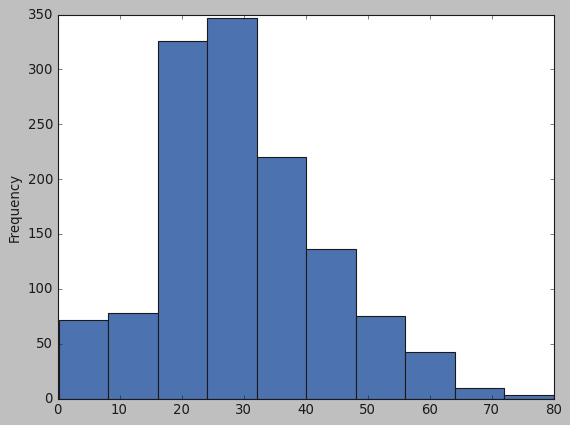

In [211]:
# your code here
titanic_df.Age.plot.hist();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

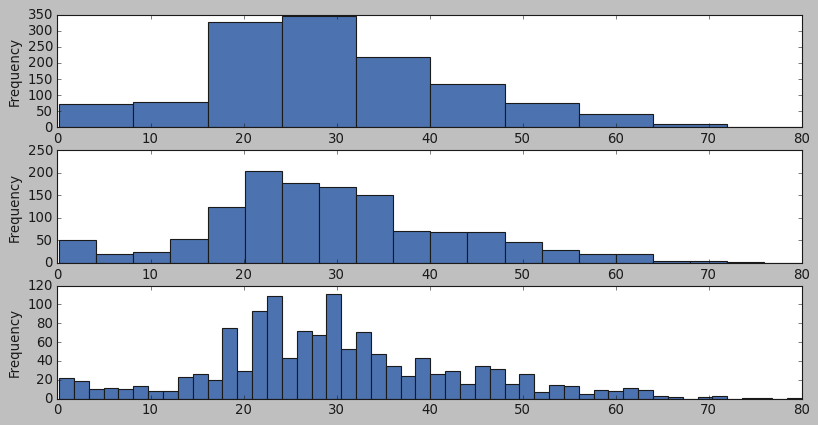

In [214]:
# your code here
fig, ax = plt.subplots(3, 1, figsize=(12,6))
titanic_df.Age.plot.hist(bins=10, ax=ax[0])
titanic_df.Age.plot.hist(bins=20, ax=ax[1])
titanic_df.Age.plot.hist(bins=50, ax=ax[2])

#### How does the bin size affect your plot?

In [ ]:
"""
Cuando el bin es más alto, más valores exactos te da, dependiendo del año. 
Si es bin es bajo, te coje una media de los años entre los que comprende el dato. 
"""

#### Use seaborn to show the distribution of column `Age`.

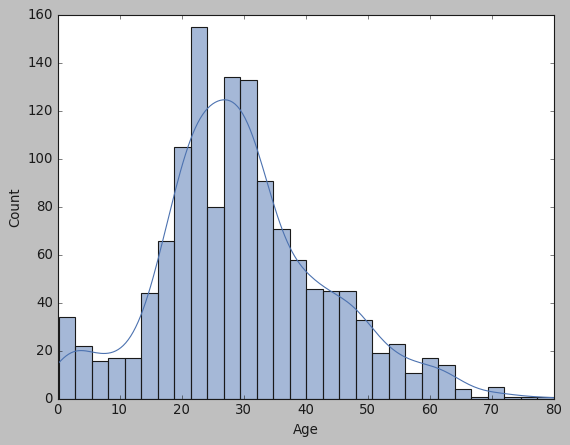

In [218]:
# your code here
sns.histplot(x=titanic_df.Age, kde=True);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

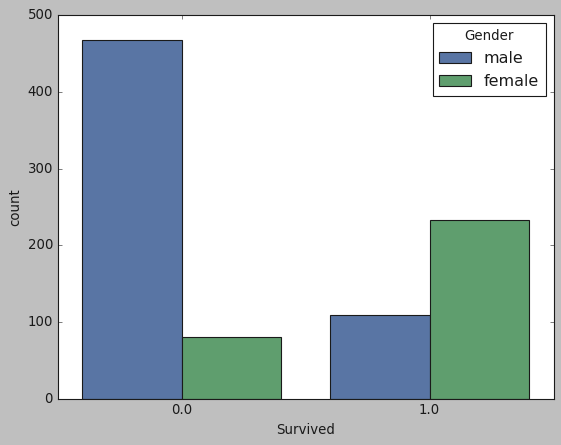

In [232]:
# Method 1 - matplotlib
# your code here
titanic_df.groupby(["Survived", "Gender"])["Gender"].count().plot(kind="bar");

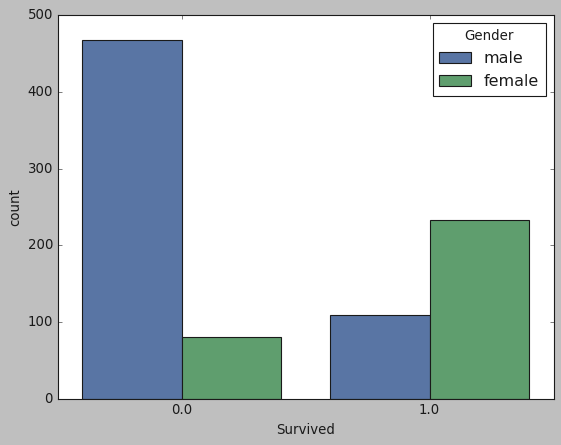

In [233]:
# Method 2 - seaborn
# your code here
sns.countplot(x="Survived", hue="Gender", data=titanic_df);

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Gender'>

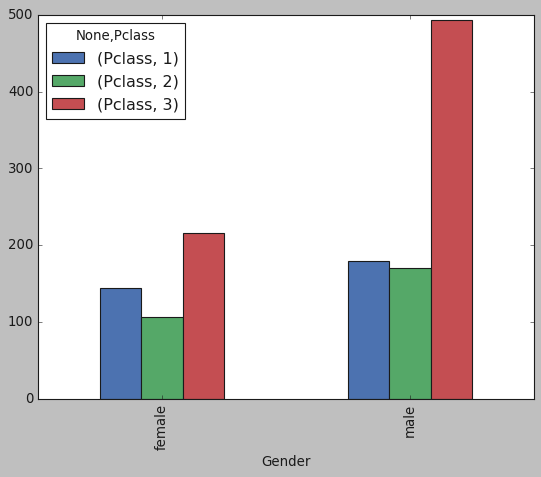

In [240]:
# your code here
titanic_df.groupby(["Gender", "Pclass"]).agg({"Pclass":"count"}).unstack().plot(kind="bar")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [332]:
# your code here


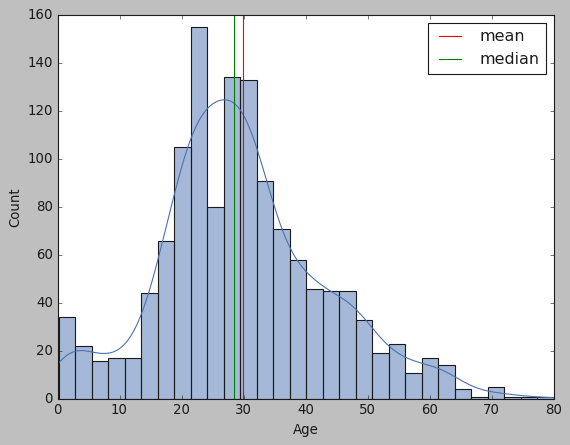

In [336]:
age_summary = sns.histplot(data=titanic_df, x= "Age", multiple="stack", kde=True)
age_summary.axvline(x=titanic_df.Age.mean(), c="red", label="mean")
age_summary.axvline(x=titanic_df.Age.median(), c="green", label="median")
plt.legend();


In [ ]:
"""
The average age was around the 30´s, having more distributed ages in the older dates. Having also a high peak in babies. 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

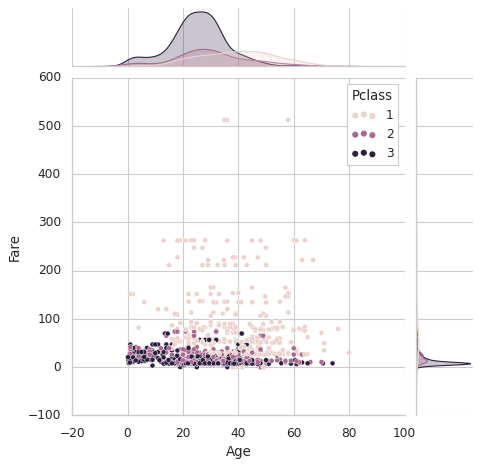

In [331]:
# your code here
sns.jointplot(data=titanic_df, x="Age", y="Fare", hue= "Pclass")

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
The cheapest tickets were in 2nd and third class, with a majority of young people. 
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

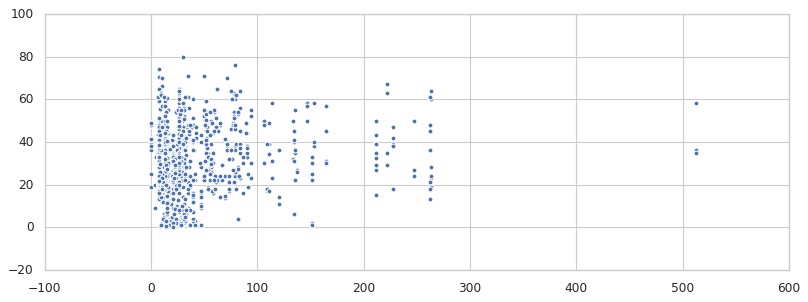

In [325]:
# Method 1 - matplotlib
# your code 
plt.scatter(x=titanic_df.Fare, y=titanic_df.Age)

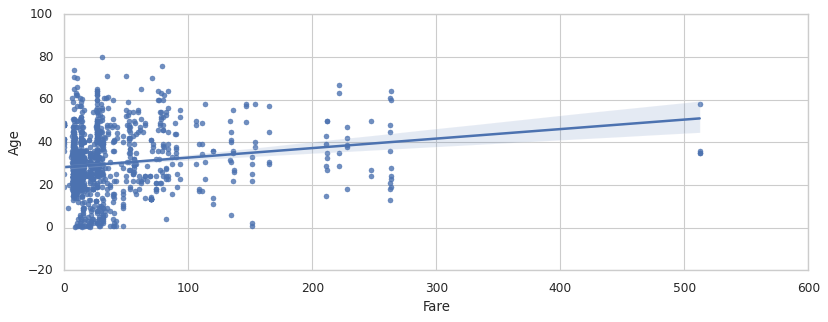

In [324]:
# Method 2 - seaborn
# your code here
sns.regplot(x="Fare", y="Age", data=titanic_df);

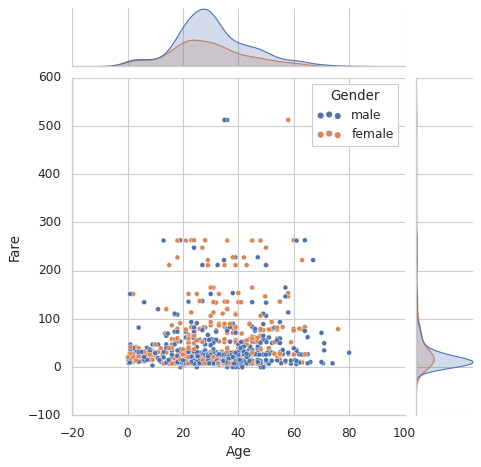

In [323]:
sns.jointplot(data=titanic_df, x="Age", y="Fare", hue = "Gender")

#### Plot the correlation matrix using seaborn.

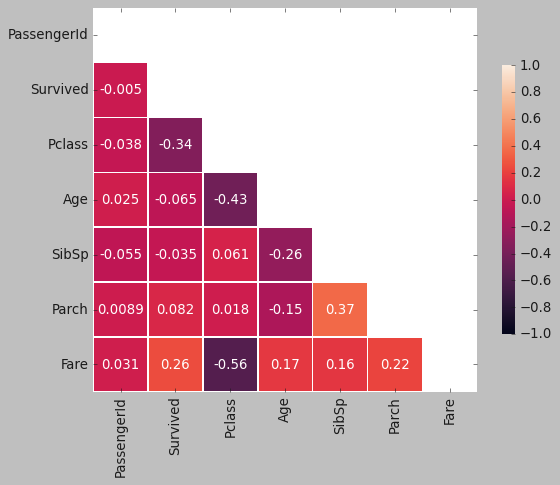

In [296]:
# your code here 
corr = titanic_df.corr()
sns.heatmap(corr,  
            mask = mascara,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7
                     },# barra lateral
            annot=True
);

#### What are the most correlated features?

In [ ]:
"""
The most correlated features are the Pclass and Fare.  And the other one is the age and Pclass. It makes sense, since the older, the richer and more expensive the ticket. 
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

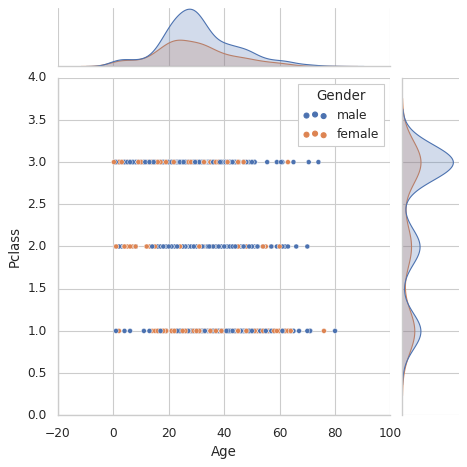

In [322]:
# your code here
sns.jointplot(data=titanic_df, x="Age", y="Pclass", hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Count'>

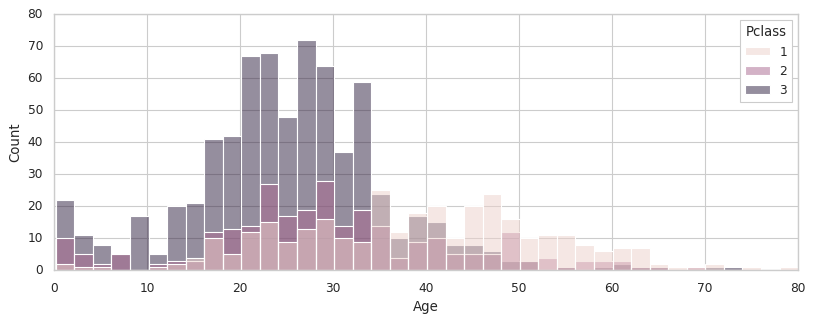

In [327]:
sns.histplot(data=titanic_df, x="Age", hue="Pclass", bins=40)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here
#Face = sns.FacetGrid(titanic_df, col="Gender",  row="Age")
#No me funciona, se me queda en infinito en 